# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

import pandas as pd 


# Challenge 1 - Explore the Scikit-Learn Datasets

Before starting to work on our own datasets, let's first explore the datasets that are included in this Python library. These datasets have been cleaned and formatted for use in ML algorithms.

First, we will load the diabetes dataset. Do this in the cell below by importing the datasets and then loading the dataset  to the `diabetes` variable using the `load_diabetes()` function ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)).

In [2]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()


Let's explore this variable by looking at the different attributes (keys) of `diabetes`. Note that the `load_diabetes` function does not return dataframes. It returns you a Python dictionary.

In [3]:
diabetes_keys = diabetes.keys() 

print("Keys of the diabetes dictionary:")
for key in diabetes_keys:
    print(key)


Keys of the diabetes dictionary:
data
target
frame
DESCR
feature_names
data_filename
target_filename
data_module


#### The next step is to read the description of the dataset. 

Print the description in the cell below using the `DESCR` attribute of the `diabetes` variable. Read the data description carefully to fully understand what each column represents.

*Hint: If your output is ill-formatted by displaying linebreaks as `\n`, it means you are not using the `print` function.*

In [4]:
print(diabetes.DESCR)


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

#### Based on the data description, answer the following questions:

1. How many attributes are there in the data? What do they mean?

1. What is the relation between `diabetes['data']` and `diabetes['target']`?

1. How many records are there in the data?

In [38]:
# The data has a total of 10 attributes.
# the diabetes[data] contains the feature data (x) for the diabetes patients, it includes the values of the 10 attributes for each of the 442 patients.
# the diabetes[target] contains the target variable (Y) for the dataset, it represents a quantitive measure of disease progression one year after the baseline for each of the 442 patients, its the variable i would want to predict or analyze.
# there are 442 records


#### Now explore what are contained in the *data* portion as well as the *target* portion of `diabetes`. 

Scikit-learn typically takes in 2D numpy arrays as input (though pandas dataframes are also accepted). Inspect the shape of `data` and `target`. Confirm they are consistent with the data description.

In [5]:
import numpy as np 

data = diabetes['data']
target = diabetes['target']


data_shape = data.shape
target_shape = target.shape


print ("Shape of data:", data_shape) 
print ("Shape of target:", target_shape)


if data_shape[0] == target_shape [0] == 442 and data_shape[1] == 10:
    print("Shapes are consistent with the data description.")
else:  
    print("They do not match")


Shape of data: (442, 10)
Shape of target: (442,)
Shapes are consistent with the data description.


# Challenge 2 - Perform Supervised Learning on the Dataset

The data have already been split to predictor (*data*) and response (*target*) variables. Given this information, we'll apply what we have previously learned about linear regression and apply the algorithm to the diabetes dataset.

#### Let's briefly revisit the linear regression formula:

```
y = β0 + β1X1 + β2X2 + ... + βnXn + ϵ
```

...where:

- X1-Xn: data 
- β0: intercept 
- β1-βn: coefficients 
- ϵ: error (cannot explained by model)
- y: target

Also take a look at the `sklearn.linear_model.LinearRegression` [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

#### In the cell below, import the `linear_model` class from `sklearn`. 

In [6]:
from sklearn import linear_model 



#### Create a new instance of the linear regression model and assign the new instance to the variable `diabetes_model`.

In [7]:
from sklearn.linear_model import LinearRegression 

diabetes_model = LinearRegression() 

#### Next, let's split the training and test data.

Define `diabetes_data_train`, `diabetes_target_train`, `diabetes_data_test`, and `diabetes_target_test`. Use the last 20 records for the test data and the rest for the training data.

In [8]:
diabetes_data_train = data[:-20]
diabetes_target_train = target[:-20]
diabetes_data_test = data[-20:]
diabetes_target_test = target[-20:]


Fit the training data and target to `diabetes_model`. Print the *intercept* and *coefficients* of the model.

In [9]:
diabetes_model.fit(diabetes_data_train, diabetes_target_train)

print("Intercept:", diabetes_model.intercept_)
print("Coefficients:", diabetes_model.coef_)


Intercept: 152.76429169049118
Coefficients: [ 3.06094248e-01 -2.37635570e+02  5.10538048e+02  3.27729878e+02
 -8.14111926e+02  4.92799595e+02  1.02841240e+02  1.84603496e+02
  7.43509388e+02  7.60966464e+01]


#### Inspecting the results

From the outputs you should have seen:

- The intercept is a float number.
- The coefficients are an array containing 10 float numbers.

This is the linear regression model fitted to your training dataset.

#### Using your fitted linear regression model, predict the *y* of `diabetes_data_test`.

In [10]:
diabetes_prediction = diabetes_model.predict(diabetes_data_test)

print("Predicted Y for the data:")
print(diabetes_prediction)


Predicted Y for the data:
[197.61898486 155.44031962 172.88875144 111.53270645 164.79397301
 131.06765869 259.12441219 100.47873746 117.06005372 124.30261597
 218.36868146  61.19581944 132.24837933 120.33293546  52.54513009
 194.03746764 102.5756431  123.56778709 211.03465323  52.60221696]


#### Print your `diabetes_target_test` and compare with the prediction. 

In [11]:
print("Actual Y for the test data:")
print(diabetes_target_test)


print("\nComparison with Predictions:")
for actual, predicted in zip(diabetes_target_test, diabetes_prediction):
    print(f"Actual: {actual:.2f}, Predicted: {predicted:.2f}")


Actual Y for the test data:
[233.  91. 111. 152. 120.  67. 310.  94. 183.  66. 173.  72.  49.  64.
  48. 178. 104. 132. 220.  57.]

Comparison with Predictions:
Actual: 233.00, Predicted: 197.62
Actual: 91.00, Predicted: 155.44
Actual: 111.00, Predicted: 172.89
Actual: 152.00, Predicted: 111.53
Actual: 120.00, Predicted: 164.79
Actual: 67.00, Predicted: 131.07
Actual: 310.00, Predicted: 259.12
Actual: 94.00, Predicted: 100.48
Actual: 183.00, Predicted: 117.06
Actual: 66.00, Predicted: 124.30
Actual: 173.00, Predicted: 218.37
Actual: 72.00, Predicted: 61.20
Actual: 49.00, Predicted: 132.25
Actual: 64.00, Predicted: 120.33
Actual: 48.00, Predicted: 52.55
Actual: 178.00, Predicted: 194.04
Actual: 104.00, Predicted: 102.58
Actual: 132.00, Predicted: 123.57
Actual: 220.00, Predicted: 211.03
Actual: 57.00, Predicted: 52.60


#### Is `diabetes_target_test` exactly the same as the model prediction? Explain.

In [12]:
# No, they are different.


# Challenge 3 - Peform Supervised Learning on a Pandas Dataframe

Now that we have dealt with data that has been formatted for scikit-learn, let's look at data that we will need to format ourselves.

In the next cell, load the `auto-mpg.csv` file included in this folder and assign it to a variable called `auto`.

In [13]:
import pandas as pd

auto = pd.read_csv("C:\\Users\\David Santos\\Desktop\\lab-supervised-learning-regression\\auto-mpg.csv")


Look at the first 5 rows using the `head()` function:

In [14]:
auto.head()


,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,"\t""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693,11.5,70,"\t""buick skylark 320"""
2,18.0,8,318.0,150.0,3436,11.0,70,"\t""plymouth satellite"""
3,16.0,8,304.0,150.0,3433,12.0,70,"\t""amc rebel sst"""
4,17.0,8,302.0,140.0,3449,10.5,70,"\t""ford torino"""


Evaluate the data to ensure that all numeric columns are correctly detected as such by pandas. If a column is misclassified as object, coerce it to numeric.

In [15]:
data_types = auto.dtypes

numeric_columns = data_types[data_types != 'object']

if len(numeric_columns) == len (auto.columns):
    print("All columns are numeric")
else: 
    print("Not all columns are numeric, the non-numeric columns are:")
    non_numeric_columns = data_types[data_types == 'object']
    print(non_numeric_columns)


Not all columns are numeric, the non-numeric columns are:
car_name    object
dtype: object


In [16]:
auto['car_name_numeric'] = pd.Categorical(auto['car_name']).codes

What is the newest model year and the oldest model year?

In [17]:
newest = auto['model_year'].max()
oldest = auto['model_year'].min()

print("The newest model year is:", newest)
print("The oldest model year is:", oldest)

The newest model year is: 82
The oldest model year is: 70


Check the dataset for missing values and remove all rows containing at least one missing value.

In [18]:
missing_values = auto.isnull().sum() 

auto_cleaned = auto.dropna()


Find the frequency table for the `cylinders` column using the `value_counts()` function. How many possible values of cylinders are there?

In [19]:
frequency = auto['cylinders'].value_counts() 

num_unique_cylinders = len (frequency)


print("Frequency Table for 'cylinders' column:")
print(frequency)
print("\nNumber of Possible Values for 'cylinders':",num_unique_cylinders )

Frequency Table for 'cylinders' column:
4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

Number of Possible Values for 'cylinders': 5


We would like to generate a linear regression model that will predict mpg. To do this, first drop the `car_name` column since it does not contain any quantitative data. Next separate the dataframe to predictor and response variables. Separate those into test and training data with 80% of the data in the training set and the remainder in the test set. 

Assign the predictor and response training data to `X_train` and `y_train` respectively. Similarly, assign the predictor and response test data to `X_test` and `y_test`.

*Hint: To separate data for training and test, use the `train_test_split` method we used in previous labs.*

In [20]:
from sklearn.model_selection import train_test_split 

auto = auto.drop(columns = ['car_name'])

X = auto.drop(columns = ['mpg'])
y = auto['mpg']

X_train, X_test, y_train, y_test = train_test_split ( X, y, test_size = 0.2, random_state = 42 )


Now we will processed and peform linear regression on this data to predict the mpg for each vehicle. 

#### In the next cell, create an instance of the linear regression model and call it `auto_model`. Fit `auto_model` with your training data.

In [22]:
auto.head()

,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year,car_name_numeric
0,18.0,8,307.0,130.0,3504,12.0,70,50
1,15.0,8,350.0,165.0,3693,11.5,70,35
2,18.0,8,318.0,150.0,3436,11.0,70,234
3,16.0,8,304.0,150.0,3433,12.0,70,14
4,17.0,8,302.0,140.0,3449,10.5,70,162


In [26]:
from sklearn.linear_model import LinearRegression 
from sklearn.impute import SimpleImputer

auto.dropna(inplace=True)

X = auto[['cylinders', 'displacement', 'horse_power', 'weight', 'acceleration', 'model_year', 'car_name_numeric']]
y = auto['mpg']


imputer = SimpleImputer(strategy='median')


X = imputer.fit_transform(X)


auto_model = LinearRegression()


auto_model.fit(X, y)


LinearRegression()

# Challenge 4 - Evaluate the Model

In addition to evaluating your model with F-test and t-test, you can also use the *Coefficient of Determination* (a.k.a. *r squared score*). This method does not simply tell *yes* or *no* about the model fit but instead indicates how much variation can be explained by the model. Based on the r squared score, you can decide whether to improve your model in order to obtain a better fit.

You can learn about the r squared score [here](https://en.wikipedia.org/wiki/Coefficient_of_determination). In the end, we want the r-squared score to be as high as possible.

#### In the next cell, compute the predicted *y* based on `X_train` and call it `y_pred`. Then calcualte the r squared score between `y_pred` and `y_train` which indicates how well the estimated regression model fits the training data.

*Hint: r squared score can be calculated using `sklearn.metrics.r2_score` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)).*

In [29]:
from sklearn.metrics import r2_score

imputer = SimpleImputer(strategy='median')


X_train_imputed = imputer.fit_transform(X_train)


y_pred = auto_model.predict(X_train_imputed)


r_squared = r2_score(y_train, y_pred)


print("R-squared Score:", r_squared)

R-squared Score: 0.8077444936657812


#### Our next step is to evaluate the model using the test data. 

We would like to ensure that our model is not overfitting the data. This means that our model was made to fit too closely to the training data by being overly complex. If a model is overfitted, it is not generalizable to data outside the training data. In that case, we need to reduce the complexity of the model by removing certain features (variables).

In the cell below, use the model to generate the predicted values for the test data and assign them to `y_test_pred`. Compute the r squared score of the predicted `y_test_pred` and the oberserved `y_test` data.

In [30]:
X_test_imputed = imputer.transform(X_test)


y_test_pred = auto_model.predict(X_test_imputed)


r_squared_test = r2_score(y_test, y_test_pred)


print("R-squared Score (Test Data):", r_squared_test)


R-squared Score (Test Data): 0.8379409311414543


#### Explaining the results

The r squared scores of the training data and the test data are pretty close (0.8146 vs 0.7818). This means our model is not overfitted. However, there is still room to improve the model fit. Move on to the next challenge.

# Challenge 5 - Improve the Model Fit

While the most common way to improve the fit of a model is by using [regularization](https://datanice.github.io/machine-learning-101-what-is-regularization-interactive.html), there are other simpler ways to improve model fit. The first is to create a simpler model. The second is to increase the train sample size.

Let us start with the easier option and increase our train sample size to 90% of the data. Create a new test train split and name the new predictors and response variables `X_train09`, `X_test09`, `y_train09`, `y_test09`.

In [31]:
auto.dropna(inplace=True)

X = auto[['cylinders', 'displacement', 'horse_power', 'weight', 'acceleration', 'model_year', 'car_name_numeric']]
y = auto['mpg']


imputer = SimpleImputer(strategy='median')

X = imputer.fit_transform(X)


X_train09, X_test09, y_train09, y_test09 = train_test_split(X, y, test_size=0.1, random_state=42)


Initialize a new linear regression model. Name this model `auto_model09`. Fit the model to the new sample (training) data.

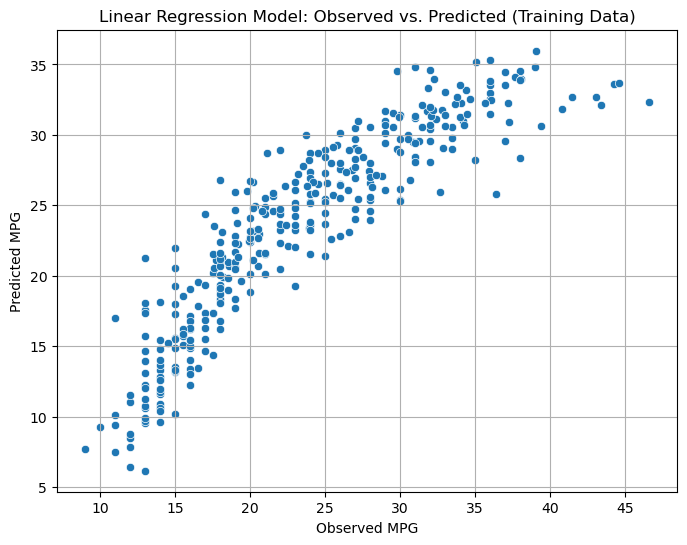

In [33]:
auto_model09 = LinearRegression()

auto_model09.fit(X_train09, y_train09)


import matplotlib.pyplot as plt
import seaborn as sns


y_pred_train = auto_model09.predict(X_train09)


plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_train09, y=y_pred_train)
plt.xlabel("Observed MPG")
plt.ylabel("Predicted MPG")
plt.title("Linear Regression Model: Observed vs. Predicted (Training Data)")
plt.grid(True)
plt.show()

Compute the predicted values and r squared score for our new model and new sample data.

In [34]:
from sklearn.metrics import r2_score


y_test_pred09 = auto_model09.predict(X_test09)

r_squared_test09 = r2_score(y_test09, y_test_pred09)

print("R-squared Score (Test Data):", r_squared_test09)

R-squared Score (Test Data): 0.8422954200041611


Compute the r squared score for the smaller test set. Is there an improvement in the test r squared?

In [37]:
X_test_imputed = imputer.transform(X_test)


y_test_pred = auto_model.predict(X_test_imputed)


r_squared_test = r2_score(y_test, y_test_pred)


print("R-squared Score (Original Test Data):", r_squared_test)


#No there wasnt any improvement.

R-squared Score (Original Test Data): 0.837942239851929


# Bonus Challenge - Backward Elimination 

The main way to produce a simpler linear regression model is to reduce the number of variables used in the model. In scikit-learn, we can do this by using recursive feature elimination. You can read more about RFE [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html).

In the next cell, we will import RFE

In [ ]:
from sklearn.feature_selection import RFE

Follow the documentation and initialize an RFE model using the `auto_model` linear regression model. Set `n_features_to_select=3`

In [ ]:
# Your code here:


Fit the model and print the ranking

In [ ]:
# Your code here:


Feature importance is ranked from most important (1) to least important (4). Generate a model with the three most important features. The features correspond to variable names. For example, feature 1 is `cylinders` and feature 2 is `displacement`.

Perform a test-train split on this reduced column data and call the split data `X_train_reduced`, `X_test_reduced`, `y_test_reduced`, `y_train_reduced`. Use an 80% split.

In [ ]:
# Your code here:


Generate a new model called `auto_model_reduced` and fit this model. Then proceed to compute the r squared score for the model. Did this cause an improvement in the r squared score?

In [ ]:
# Your code here: 


#### Conclusion

You may obtain the impression from this lab that without knowing statistical methods in depth, it is difficult to make major progress in machine learning. That is correct. If you are motivated to become a data scientist, statistics is the subject you must be proficient in and there is no shortcut. 

Completing these labs is not likely to make you a data scientist. But you will have a good sense about what are there in machine learning and what are good for you. In your future career, you can choose one of the three tracks:

* Data scientists who need to be proficient in statistical methods.

* Data engineers who need to be good at programming.

* Data integration specialists who are business or content experts but also understand data and programming. This cross-disciplinary track brings together data, technology, and business and will be in high demands in the next decade.